Model Analysis for Historical daily oil and natural gas prices
Author: Amber Huang

In [1]:
import pandas as pd
df = pd.read_csv("Historical daily oil and natural gas prices.csv")
df

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.9000,24.7000,23.8900,24.3900,32509,USD
1,Brent Oil,2000-01-05,24.2500,24.3700,23.7000,23.7300,30310,USD
2,Brent Oil,2000-01-06,23.5500,24.2200,23.3500,23.6200,44662,USD
3,Brent Oil,2000-01-07,23.5700,23.9800,23.0500,23.0900,34826,USD
4,Brent Oil,2000-01-10,23.0400,23.7800,23.0400,23.7300,26388,USD
...,...,...,...,...,...,...,...,...
23019,Heating Oil,2022-06-13,4.3612,4.3762,4.1949,4.2834,46406,USD
23020,Heating Oil,2022-06-14,4.2749,4.4570,4.2488,4.3940,36652,USD
23021,Heating Oil,2022-06-15,4.3816,4.6070,4.3557,4.5470,36908,USD
23022,Heating Oil,2022-06-16,4.5320,4.5825,4.4124,4.5713,28269,USD


**ARIMA for Brent Oil (close)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df["Date"] = pd.to_datetime(df["Date"])

brent = df[df["Symbol"] == "Brent Oil"].copy()
brent = brent.sort_values("Date")
brent.set_index("Date", inplace=True)

price = brent["Close"]
price.head()

Date
2000-01-04    24.39
2000-01-05    23.73
2000-01-06    23.62
2000-01-07    23.09
2000-01-10    23.73
Name: Close, dtype: float64

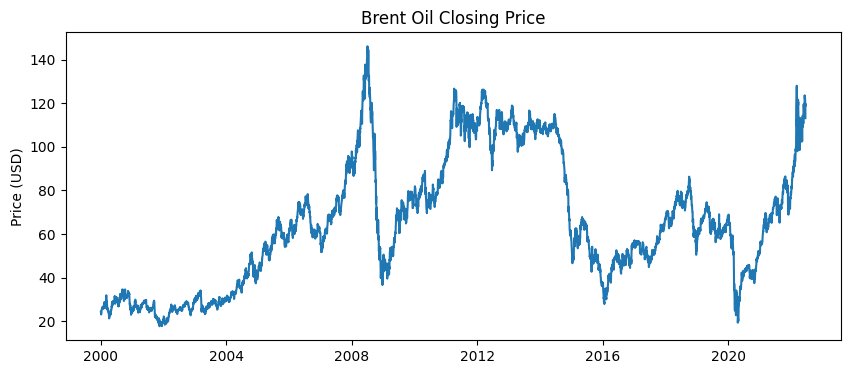

In [4]:
plt.figure(figsize=(10,4))
plt.plot(price)
plt.title("Brent Oil Closing Price")
plt.ylabel("Price (USD)")
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(price.dropna())

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -1.9181763725568572
p-value: 0.32355927426098874


p-value > 0.05

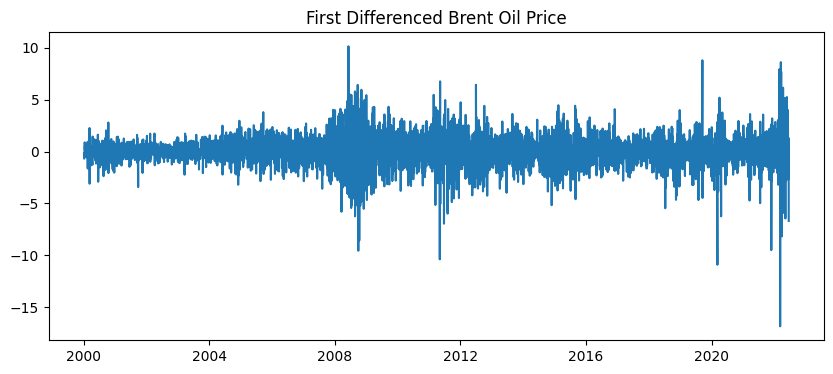

In [6]:
price_diff = price.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(price_diff)
plt.title("First Differenced Brent Oil Price")
plt.show()


In [7]:
adf_diff = adfuller(price_diff)

print("ADF Statistic (diff):", adf_diff[0])
print("p-value (diff):", adf_diff[1])


ADF Statistic (diff): -15.230088646712442
p-value (diff): 5.336311437446852e-28


Fit ARIMA


In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(price, order=(1,1,1))
result = model.fit()

print(result.summary())


c:\Qian Huang\SPE project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Qian Huang\SPE project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Qian Huang\SPE project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5768
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10205.320
Date:                Tue, 10 Feb 2026   AIC                          20416.640
Time:                        00:22:54   BIC                          20436.620
Sample:                             0   HQIC                         20423.592
                               - 5768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2354      0.174      1.352      0.176      -0.106       0.577
ma.L1         -0.2745      0.171     -1.608      0.108      -0.609       0.060
sigma2         2.0163      0.017    121.255      0.0

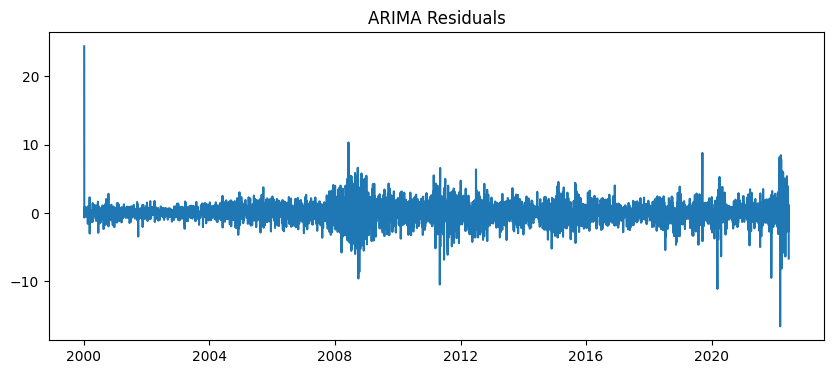

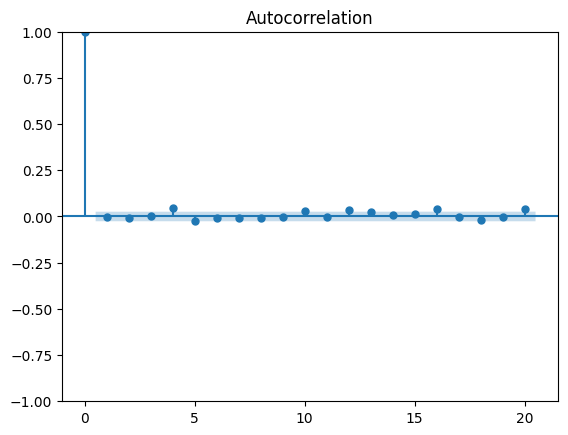

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

residuals = result.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.show()

plot_acf(residuals.dropna(), lags=20)
plt.show()


c:\Qian Huang\SPE project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Qian Huang\SPE project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


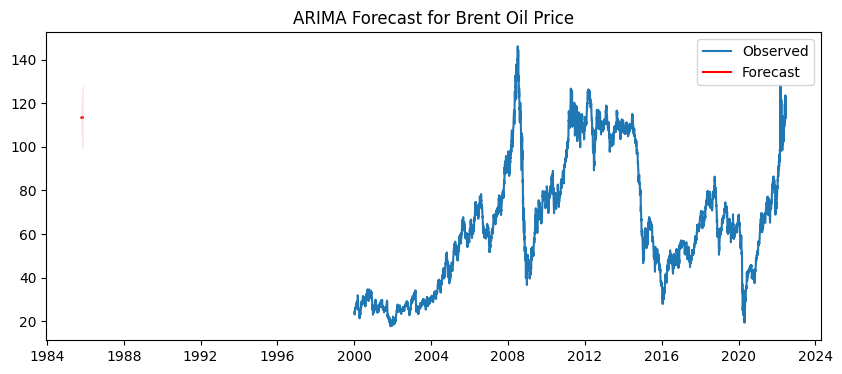

In [11]:
forecast = result.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(10,4))
plt.plot(price, label="Observed")
plt.plot(forecast_mean, label="Forecast", color="red")
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color="pink", alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast for Brent Oil Price")
plt.show()
